t-distribution stochastic neighbor embedding

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn import datasets
from sklearn import manifold

%matplotlib inline

In [3]:
data = datasets.fetch_openml(
'mnist_784',
    version = 1,
    return_X_y=True
)

In [4]:
pixel_values, targets = data
targets = targets.astype(int)

In [21]:
pixel_values = pixel_values.to_numpy()

In [25]:
targets = targets.to_numpy()

In [22]:
pixel_values.shape

(70000, 784)

In [23]:
pixel_values

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [24]:
targets.shape

(70000,)

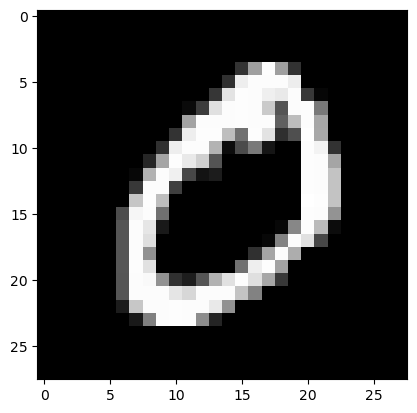

In [26]:
# single_image = pixel_values[1,:].reshape(28,28)
single_image = pixel_values[1, :].reshape(28,28)
plt.imshow(single_image, cmap='gray')

In [28]:
tsne = manifold.TSNE(n_components =2, random_state=42)
transformed_data = tsne.fit_transform(pixel_values[:3000,:])

/Users/anniewang/anaconda3/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/anniewang/anaconda3/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [32]:
targets[:3000]

array([5, 0, 4, ..., 9, 1, 5])

In [42]:
tsne_df = pd.DataFrame(
    np.column_stack((transformed_data,targets[:3000])),
    columns=["x","y","targets"]
)
tsne_df.loc[:,"targets"] = tsne_df.targets.astype(int)

/var/folders/c3/bpdxc7yj4wl9y93ngnz5p7nh0000gn/T/ipykernel_38973/452302483.py:5: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  tsne_df.loc[:,"targets"] = tsne_df.targets.astype(int)


In [49]:
tsne_df.head(10)

,x,y,targets
0,31.722771,-16.391663,5
1,10.612940,-67.804901,0
2,49.593014,38.388294,4
3,-37.814510,32.660255,1
4,22.104887,31.574816,9
5,-20.023834,5.170237,2
6,-58.184368,-9.584998,1
7,23.328159,-14.326128,3
8,-53.283909,-5.448031,1
9,2.919093,30.534452,4


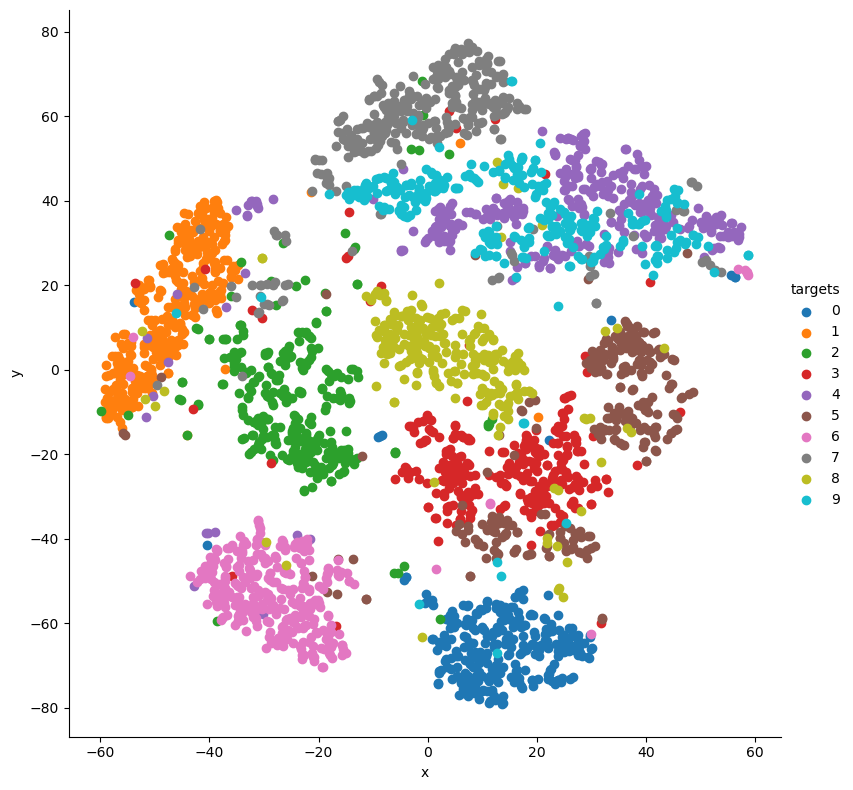

In [48]:
grid = sns.FacetGrid(tsne_df,hue='targets',height=8)
grid.map(plt.scatter,"x","y").add_legend()